# Embeddings

In this notebook two different embeddings, FastText and Word2Vex are trained on domain specific corpora.  Furthermore a few sanity checks on the objects involved are done.

In [1]:
import pickle
import gensim
import numpy as np
from matplotlib import pyplot as plt
from gensim.models import FastText, Word2Vec, KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile

%matplotlib inline

## Loading a pretrained model

In [ ]:
# Load Facebook pretrained FastText in gensim, either bin or vec.
# Source: https://fasttext.cc/docs/en/crawl-vectors.html

# model = FastText.load_fasttext_format('../WordEmbeddings/FastText/cc.de.300.bin') 
model =  KeyedVectors.load_word2vec_format('../WordEmbeddings/FastText/cc.de.300.vec') 

In [ ]:
# sanity checks

print(model.wv.vectors.shape)

print(model.similarity('Lehrer', 'Lehrerin'))
# Output = 0.683924396754

#print(model.most_similar(positive=['frau', 'könig'], negative=['mann']))
print(model.most_similar(positive=["Auto", "Fahrer"], negative=["Fahrrad"]))

## Training word2vec and FastText on domain specific data corpora

In [2]:
# import and merge data

with open("../Data/CRQ_preprocessed.pkl",'rb') as file:
    CRQ_data = pickle.load(file)

with open("../Data/CRQ_test_preprocessed.pkl",'rb') as file:
    CRQ_test_data = pickle.load(file)
    
with open("../Data/CRQ_train_preprocessed.pkl",'rb') as file:
    CRQ_train_data = pickle.load(file)
    
with open("../Data/Patents_preprocessed.pkl",'rb') as file:
    patents_data = pickle.load(file)
    
with open("../Data/Books_preprocessed.pkl",'rb') as file:
    books_data = pickle.load(file)
    
training_data = CRQ_data + CRQ_test_data + CRQ_train_data + patents_data + books_data

In [3]:
# Generate some descriptive statistics to characterize the dataset

print(len(training_data))
print(training_data[15427])
sum = 0
length = []
for i in training_data:
    sum+=len(i)
    length.append(len(i))
    
print(sum)
print(length[:20])
l = np.array(length)
print("Maximum length is {}".format(l.max()))
print("Minimum length is {}".format(l.min()))
print("Mean length is {}".format(l.mean()))
s = np.sort(l)
print(s[:100])

print(len(training_data[15427][0]))


def longest_word(data):
    longest = [0]
    cnt=0
    for i in range(len(data)):
        len_word=[0]
        for j in data[i]:
            if len(j)>40:
                print(i, j)
                cnt+=1
            len_word.append(len(j))
        longest.append(max(len_word))
    print(cnt)    
    return (max(longest))

def shortest_word(data):
    shortest = [99]
    for i in data:
        len_word=[99]
        for j in i:
            len_word.append(len(j))
        shortest.append(min(len_word))
    return (min(shortest))

print(longest_word(training_data))
print(shortest_word(training_data))

27801
['testdurchführung']
7177448
[4, 47, 29, 78, 58, 39, 116, 37, 52, 52, 31, 94, 140, 62, 7, 19, 86, 58, 69, 54]
Maximum length is 312768
Minimum length is 0
Mean length is 258.17229596057695
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6]
16
4388 drehzahlreglersummenmomentenschnittstelle
4390 drehzahlreglersummenmomentenschnittstelle
6151 drehzahlreglersummenmomentenschnittstelle
8891 sensordatenfusionschnittstellenaufbereitung
9089 führungsgrößenaufschaltungsbegrenzungsfunktionalität
11372 dosiermengenabweichungsdiagnoseanforderung
11931 signalbereitstellungsbereitstellungskomponente
12681 rekuperationsstufensignalverarbeitungsfunktion
12732 rekuperationsstufensignalauswertungfunktion
16307 abgasgegendruckbegrenzungsregelungsfunktionalität
18317 programmierrichtlinienprogrammierrichtlinien
19242 programmierrichtlinienprogrammie

27420 kraftstoffeinspritzmengenberechnungsroutine
27420 kraftstoffeinspritzmengenberechnungsroutine
27420 kraftstoffeinspritzperiodenberechnungsroutine
27420 kraftstoffeinspritzperiodenberechnungsroutine
27420 kraftstoffeinspritzmengenberechnungsroutine
27420 kraftstoffeinspritzperiodenberechnungsroutine
27420 kraftstoffeinspritzperiodenberechnungsroutine
27420 kraftstoffeinspritzmengenberechnungsroutine
27420 kraftstoffeinspritzperiodenberechnungsroutine
27420 kraftstoffeinspritzperiodenberechnungsroutine
27420 kraftstoffeinspritzperiodenberechnungsroutine
27420 kraftstoffeinspritzperiodenberechnungsroutine
27420 kraftstoffeinspritzperiodenberechnungsroutine
27420 kraftstoffeinspritzperiodenberechnungsroutine
27420 kraftstoffeinspritzperiodenberechnungsroutine
27423 einlassventilschließzeitvorversatzeinrichtung
27425 einlasskanalkraftstoffeinspritzvorrichtung
27425 einlasskanalkraftstoffeinspritzvorrichtung
27427 lufteinlassgeräuschreduzierungsvorrichtung
27427 lufteinlassgeräuschredu

27666 fahrzeugantriebsvorrichtungssteuervorrichtung
27666 parallelhybridfahrzeugantriebsvorrichtung
27666 brennkraftmaschinentrennkupplungsvorrichtung
27666 synchronisationsbestimmungsdifferenzdrehzahl
27666 synchronisationsbestimmungsdifferenzdrehzahl
27666 synchronisationsbestimmungsdifferenzdrehzahl
27666 synchronisationsbestimmungsdifferenzdrehzahl
27666 synchronisationsbestimmungsdifferenzdrehzahl
27666 synchronisationsbestimmungsdifferenzdrehzahl
27666 synchronisationsbestimmungsdifferenzdrehzahl
27666 synchronisationsbestimmungsdifferenzdrehzahl
27666 synchronisationsbestimmungsdifferenzdrehzahl
27666 synchronisationsbestimmungsdifferenzdrehzahl
27666 synchronisationsbestimmungsdifferenzdrehzahl
27666 synchronisationsbestimmungsdifferenzdrehzahl
27666 synchronisationsbestimmungsdifferenzdrehzahl
27667 straßenunregelmäßigkeitenerfassungsvorrichtung
27667 straßenunregelmäßigkeitenerfassungsvorrichtung
27667 straßenunregelmäßigkeitenerfassungsvorrichtung
27667 fahrzeuggeschwindigke

27741 diebedeutendstewellenformfürdiefestkörperakustikstellensicherdiebiegewellendar
27741 esinfolgederbewegungsrichtungdesfestkörperszueinerunmittelbarenanregungdesumge
27741 kommtunddieauslenkungenselbstdeutlichgrößersindalsz
27741 alslösungfürdieausbreitungvonbiegewellenergibtsichz
27741 diehöherfrequentenschallanteileschnellerausbreitenalsdieniederfrequenten
27741 aufdiekonsequenzenzurbeziehungzwischenphasen
27741 ebensoseiandieserstellenurdaraufhingewiesen
27741 stimmtevoraussetzungenzwischenwellenlängeundgeometrischengrößengegebenseinmüssen
27741 abhängigkeitderrandbedingungendieortsfestenlösungen
27741 füranalytischegeschlossenelösungengelingtdiesimallgemeinenjedochnurunteridealisie
27741 wasfürdasverständnissehrhilfreichseinkann
27741 bedientmansichheuteversuchstechnikenwiederholografieoderderberechnungmithilfeder
27741 schalldruckbeiderherleitungderwellengleichunginluftwurdederschallwechseldruckalskenngrößeein
27741 derumgänglichinderakustikofteinfachalsschalldruckbezeichnetwi

27741 dasverzahnungsgeräuschtrittindeneingriffsordnungen
27741 isteinbeispielhaftesergebniseinerbeschleunigungsmessungandergetriebeober
27741 undupmkommendurcheineresonanzimbereichvonbishzzustande
27741 colourmapverzahnungsgeräuschordnungmitoberenharmonischen
27741 lernodervomverzahnungsgesetzaufgrundvonverformungenderbelastetenzähne
27741 regteschwingungenentsteheninfolgedermitdereingriffsstellungwechselndenzahnsteifigkeit
27741 dasausmaßdieserschwingungenhängtvonderverzahnungsgeometrieunddrehzahlab
27741 geisterfrequenzenbeiperiodischenzahnflankenfehlern
27741 undrasselgeräuschesindlosteilschwingungenunbelasteterschalträder
27741 diesichdurchanregungvontorsionsschwingungender
27741 getriebeeingangswelleinnerhalbihrerspielehinundherbewegen
27741 imspielbereichdurchtorsionsschwingungendergetriebewellenverursachtdurchexterne
27741 abhebenderflankenvongeschaltetenzahnrädern
27741 abhebendurchzahnfehlerundvariablesteifigkeit
27741 einbeurteilungskriteriumistdieklapperkurve
27741 hängigkei

27741 übertragendenmotordrehmomenteisteineakustischeentkopplunganderkoppelstellemotorzu
27741 zurverminderungderschallabstrahlungvondergetriebeoberfläche
27741 bietensichprimärmaßnahmenimgetriebeundamgehäuse
27741 gestaltungdesgetriebegehäusesodersekundärmaßnahmenwieteilkapselnan
27741 könnenabhängigvonderfahrzeugkonstruktionentwederamgetriebeoderamfahrzeugrahmen
27741 ineinemfahrerhaustretenschallereignisseunter
27741 primärluftschallüberschwingungenvonflächenelementendesantriebsstrangsunddessenzumbetrieberforder
27741 andenkleinstenöffnungenzudenschallquellenhin
27741 sekundärluftschallvonprimärluftschallzuschwingungenangeregtenoberflächenelementedesfahrerhausesstrahlen
27741 dietransformationprimärluftschallzukörperschallanfahrerhausflächen
27741 körperschallinduziertersekundärluftschall
27741 schwingungenanlagerstellenzueigenschwingungen
27741 betriebdesfahrzeugesüberdielagerunghinweg
27741 lagerungderlenksäuleanderfahrerhausstirnwand
27741 amschalldämpferendrohrundanderansaugöffnu

27748 dieimzustandsraummodellvorkommendenmatrizen
27748 dasverhaltendersystemewirdimzeitintervall
27748 wennmanbeispielsweiseeinesinusfırmigeeingangsgrı§e
27748 beschreibunglinearersystemedurchdifferenzialgleichungen
27748 beschreibunglinearersystemedurchdifferenzialgleichungen
27748 diedifferenzialgleichungbeschreibtdendynamischenzusammenhangzwischen
27748 isteinelinearegewıhnlichedifferenzialgleichung
27748 diedifferenzialgleichungwirdh−uþgsoumgeformt
27748 systembeschreibungdurcheinedifferenzialgleichung
27748 diediesebedingungtechnischrealisierbarsind
27748 dieserwertwirdimfolgendeneinewichtigerollespielen
27748 beidersystembeschreibungdurcheinedifferenzialgleichunginteressiertman
27748 kalischengrundgleichungenabgeleitetwerdenkann
27748 verfahrenstechnischeprozessebetrachtetwerden
27748 nischenuntersuchungenkannalsodavonausgegangenwerden
27748 aufstellungderdifferenzialgleichungeinesreihenschwingkreises
27748 einevonau§enbeeinßussbaregrı§edarstelltunddiespannung
27748 dassystemhat

27748 entstehtdurchelementeweiselaplacetransforma
27748 ausderzustandsgleichungerh−ltmanunterverwendungdesdifferenziationssatzes
27748 darausergibtsichdieƒbertragungsfunktiondessystems
27748 systemeniedrigerordnungauchohnerechnerschnellwerdenkann
27748 buchstabesymbolisiertdielaplacetransformierte
27748 rideradjungiertenmatrixunddiekoefþzienten
27748 descharakteristischenpolynomsfolgenderma§enrekursivberechnet
27748 berechnungderƒbertragungsfunktionausderdifferenzialgleichung
27748 bestimmensiediedifferenzialgleichungdesrc
27748 transformierensiedieangegebenengleichungensofortindenfrequenzbereichund
27748 bestimmensieaufdiesemwegedieƒbertragungsfunktion
27748 rechenwegesergibtsichdabeigedemerstenrechenweg
27748 gonalelementebeschreibungundanalyselinearersystemeimfrequenzbereich
27748 ƒbertragungsfunktioneinzustandsraummodellinfrobeniusform
27748 gliedernbetrachtensiedasstation−reverhalten
27748 ƒbertragungsfunktionvondeskriptorsystemen
27748 dieƒbertragungsfunktionisteinekomplexwertige

27748 dieseregelkreisehabendieimoberenteilderabb
27748 dadiebisherbetrachtetenmodellunbestimmtheitenaufeinezerlegungder
27748 ƒbertragungsfunktionderregelstreckeindiesumme
27748 multiplikativemodellunbestimmtheitenwerden
27748 modellunbestimmtheitineinproduktderƒbertragungsfunktiondesn−herungsmodells
27748 dieregelstreckebesitztfolglicheineƒbertragungsfunktionausdermenge
27748 diezugehırigemodellstrukturdesregelkreisesistimunterenteilderabb
27748 modellunbestimmtheiteneinesdrehzahlgeregeltengleichstrommotors
27748 wenndermotoralslastunterschiedlichewebewegt
27748 nichtalsbremsendesdrehmomentunddamitalsstırgrı§e
27748 tr−gheitsmomentesundfolglichalsmodellunbestimmtheit
27748 modelldesgleichstrommotorsbeiver−ndertemtr−gheitsmoment
27748 gestricheltdargestelltekurveistdasn−herungsmo
27748 kanndiefehlerschrankenichtausdiesemdiagrammabgelesenwerden
27748 sondernesmussdieimunterenteilderabbildunggezeigtedifferenz
27748 derobereranddieserkurvenscharisteineoberefehlerschranke
27748 toleranzban

27748 diesestellgrı§ekannnichtmiteinerproportionalenregelungerzeugtwerden
27748 kpeauchkeinevonnullverschiedenestellgrı§eerzeugt
27748 derreglermussdeshalbdieeigenschaftbesitzen
27748 unterderdiesegleichungverwendetenvoraussetzung
27748 stellgrı§eimungestırtenregelkreisdenstatischenendwert
27748 aktuellenwertderstatischenverst−rkungermittelnkann
27748 ausdieserbetrachtungwirddiewirkungsweisedesi
27748 beieinersollwerterhıhungvergrı§ertderreglerdiestellgrı§esolange
27748 istdassystemstabilunddieregelungfunktioniertwiege
27748 dieregelgrı§efolgtdanndieseranhebungerstmiteinigerzeitverzıgerung
27748 einenzuhohenwertunderzeugteinenegativeregelabweichung
27748 durcheinezugro§ereglerverst−rkungkannderregelkreis
27748 frequenzregelungeineselektroenergieverteilungsnetzes
27748 deƒbertragungsfunktiondesleistungsgeregeltengenerators
27748 worausdenstatischenendwertdergangsfunktiondiebeziehung
27748 wennderleistungsreglerdesgeneratorskeinebleibenderegelabweichungzul−sst
27748 esentstehtalsoeineble

27749 anstiegdielufts−uleinderleitungwenigerbeschleunigtwirdalssiebeilangsamem
27749 dadurchstelltsichamsensorzwarimmernocheinpul
27749 dessenmittelwertaberunterhalbdesjenigenandermessstelle
27749 obermiteinemtr−genodertr−gheitslosensensorbestimmtwird
27749 dochsollteimmeraufeinemıglichstmessstellennaheanordnungdesdrucksensors
27749 auchdermessfehlerbeiderabgastemperaturistunabh−ngigvondertr−gheitdes
27749 diegemessenetemperaturhatinjedemfalleinenzeitlichenmittelwert
27749 derunterdemjenigendesdieberechnungbenıtigten
27749 ausschiebevorgangsbeihohenmassenstrımenherrschen
27749 temperaturenbeigeschlossenemauslassventilunterbewertetwerden
27749 etwazuzweidrittelderdauereinesarbeitsspielsstehenbleibt
27749 dortgemessenemitteltemperaturumbiszukunterderjenigenvorturbinelie
27749 wodiedurchstrımungbereitsgleichm−§igerist
27749 destoãrichtigeròistdiedortgemessenemitteltemperatur
27749 ergibtsichdarausbeiderauswertunginbeidenf−lleneinzuhoher
27749 abweichungenbeiderberechnungvonmittelwerten
27

27749 einederhauptschwierigkeitenlagindemerreicheneines
27749 hohenaußadegradeseinengrı§erendrehzahlbereich
27749 konstantemƒbersetzungsverh−ltnisvondermotorwelleangetriebenwird
27749 niedrigermotordrehzahlauchdiedrehzahldeszellenradsniedrig
27749 istabernurvonderjeweiligenschallgeschwindigkeit
27749 unddamitvonderjeweiligengastemperaturunddiesewiederumvommotordrehmo
27749 deszellenradslie§ensichdemnachnureinebestimmtemotorleistungoptimal
27749 beiabweichungenvomauslegungspunktweiteredruckwellen
27749 vorg−ngedemebenbeschriebeneneinfachendruckwellenprozesszu
27749 wodurchdiesesaußadeverfahreneinenweitenlast
27749 dasanf−nglicheger−uschproblemkonntedadurchgelıstwerden
27749 lenradmitzweikonzentrischenreihenvonzellengestaltetwurde
27749 trennw−ndezwischendenzelleneinerreiheungleichm−§igeabst−ndehabenund
27749 dietrennw−ndederinnerenzellenreiheaufemitdenender−u§erenzellenreihe
27749 fahrzeugdieselmotorendenangestrebtendrehmomentverlauf
27749 drehmomentimunterendrehzahlbereichundinsbesonde

27750 übertragungsnullstellenstimmenmiteigenwertendersystemmatrix
27750 währendentkopplungsnullstellennichtmitsolcheneigenwertenübereinstim
27750 diemengederinvariantennullstellensetztsichalsoausdermengeder
27750 übertragungsnullstellenunddermengederentkopplungsnullstellenzusammen
27750 dabeiwerdeneingangsentkopplungsnullstellen
27750 ausgangsentkopplungsnullstellengemeinsamalsentkopplungsnull
27750 beschreibungundverhaltenvonmehrgrößensystemen
27750 zerlegungdermengederinvariantennullstellenindiemengeder
27750 übertragungsnullstellenunddiemengederentkopplungsnullstellen
27750 wenneinsystemvollständigsteuerbarundbeobachtbarist
27750 mendieübertragungsnullstellenmitdeninvariantennullstellenübereinunddas
27750 systembesitztkeineentkopplungsnullstellen
27750 obdienullstellenmithilfederübertragungsfunktionsma
27750 trixoderderrosenbrocksystemmatrixberechnetwerden
27750 imallgemeinengibtesmehrinvariantenullstellenalsübertragungsnullstellen
27750 diezusätzlichennullstellensindentkopplungsnul

27750 angegebenenschrittekönnendirektinfunktionsaufru
27750 voraussetzungenfürdieanwendungdesprogramms
27750 •disteinenullmatrixentsprechenderdimension
27750 prüfungdervoraussetzungenzurreglereinstellung
27750 dassnichtnurderverlaufderführungsübergangsfunk
27750 sondernauchderverlaufderstellgrößenbeiderbewertungderregelgüteherange
27750 literaturhinweisedieerweiterungdereinstellregelnfüreinschlei˚geregelkreiseaufmehrgrößenreglerbe
27750 reglersowiederenerweiterungaufstreckenmitunvollständigbekannterstatikwurdenin
27750 darstellungderbishervorgeschlageneneinstellregeln˚ndetmanin
27750 erweiterungendereinstellregelnaufdezentralei
27750 dadieeigenwertedesgeschlossenenkreisesdieeigenbewegungunddas
27750 negeeignetewahlderreglerparametervorgegebenewertezuzuweisen
27750 werdendieentsprechendenberechnungsvorschriftenfürzustandsrückfüh
27750 dieexistenzbedingungenderartigerreglerdiskutiertso
27750 netechnischeinfacherrealisierbareausgangsrückführungersetztwird
27750 eswirdeinelineareregelstrec

27750 leistungsregelungmitdemdirektennyquistverfahreninfolgendenschritten
27750 entwerfensiedieteilreglereinzelnanhandderbodediagrammederdreihauptregel
27750 angegebenengüteforderungenfürdieeinzelregel
27750 dabeidiesembeispieldasstörverhaltenfürdieregler
27750 daszustandsraummodellderregelstreckehathiereineaus
27750 überprüfensiediediagonaldominanzderrückführdifferenzmatrixundverändernsie
27750 bisdieseeigenschaftnachgewiesenwerdenkann
27750 beurteilensiedieerreichteregelgüteanhandderstörübergangsfunktionsmatrixdes
27750 literaturhinweisedasdirektenyquistverfahrenwurdevonr
27750 diemathematischengrundlagensindbereitsindemhäu˚g
27750 dieerweiterungderanalyseunterverwendungderverallgemeinertendiagonaldomi
27750 beschriebenundinmehrerenweiterenarbeitenausführ
27750 wiedieforderungnachverallgemeinerterdiagonaldominanzdurchgeeignete
27750 wiediestabilitätsanalyseinähnlicherwiederhierangegebenenwei
27750 dieerweiterungderanalyseaufabschätzungdese
27750 eineausführlicheredarstellungdermethod

27750 sekundärregelungbestehtauszweidezentralenteilreglern
27750 dadasprimärgeregeltenetzasymptotischstabilist
27750 diesekundärregelungkannalsonichtinderbeabsichtigten
27750 beimnetzkennlinienverfahrenwirddieübergabeleistung
27750 alsneuemessgrößehinzugenommenundeswirdmitdenregelgrößen
27750 dassichdabeiergebendeblockschaltbildistinabb
27750 sekundärregelungnachdemnetzkennlinienverfahren
27750 derneuindenregelkreiseingefügteblockistdurch
27750 dasnetzeinschließlichderprimärregelungerfülltdiestatischebeziehung
27750 fürdasstatischeverhaltenderregelstreckeerhältmanjetzt
27750 folglichkönnenzweiteilreglermitintegralemverhaltenfürdie
27750 dadurchdieregelungzunächstnurdieersatzgrößen
27750 aufdievorgegebenenverschwindendensollwerte
27750 eundewerdenalsoauchdieeigentlichenregelgrößen
27750 dasszwischendennetzenkeineenergieausgetauschtwird
27750 derenergieaustauschhatsichgegenüberdemarbeitspunktnichtverändert
27750 demdievertraglichvereinbarteübergabeleistung˜ießt
27750 rungdergeneratorleis

27752 lastschaltendezughochschaltungohnemotormomenteneingrif
27752 zubeginnderschaltungistkupplungkgeschlossenundkupplung
27752 dermomenteneinbruchamendedieserphasestelltdentiefstenpunktimmomenten
27752 gdermotordrehzahlberechnetsichnachdemmomenten
27752 grundlagendesgangwechselsunddersynchronisation
27752 bernahmedurchkupplungkdasmomentingänzeabgebautist
27752 gsphasewirddasmomentvonderabschaltendenkupplun
27752 kanndasübertragbaremomentanderkupplungkinnerhalbderinabb
27752 derkupplungkvollständigdissipierenundstündefürdenfahrzeugantriebnichtzurverfügung
27752 lastschaltendezughochschaltungmitmotormomenteingrif
27752 überhöhungsmomentsderkupplungwirddurchdiereduktiondesmotormoment
27752 grundlagendesgangwechselsunddersynchronisation
27752 sensitivitätenambeispielderlastschaltendenzughochschaltungen
27752 gtbeispielhaftdenverspätetenabbaudesmomentanderöffnendenkupplun
27752 nachdemkupplungkdasvollständigemomentübernommenhat
27752 zuspäteraufbaudesmotormomentsnachdersynchronisationsphas

27753 dementsprechenddefiniertmandenfeuchtegradxalsverhaltnisdermassedeswasserdampfsmozurmassedertrockenenluftml
27753 absolutefeuchtebezeichnetunderrechnetsichaus
27753 partialdruckdesdampfspozupartialdruckdesdampfsbei
27753 furdasspezifischevolumenderfeuchtenluftgilt
27753 xdieenthalpiebezogenaufkgtrockeneluftoder
27753 kgkdiespezifischewarmekapazitatdeswasserdampfsundro
27753 kgdiespezifischeverdampfungswarmedeswassers
27753 diemessungdesfeuchtegradsundderrelativenfeuchtewirdunteranderemnachder
27753 darinsindxderfeuchtegraddesluftstromsvorder
27753 ttrdietemperaturdestrockenenthermometersundtrdie
27753 bekanntensattigungsdruckbeittrkannauchdie
27753 xundtpfiirverschiedenepaarungenvonttrundtrangegeben
27753 grundlagenderstromungmitwarmetransportindiesemabschnittsollengrundlagenderstromungmitwarmetransportdargelegtwerden
27753 verbrennungskraftmaschinevonbedeutungsind
27753 detailliertedarstellungenseiaufdieliteraturverwiesen
27753 nacheinleitendenallgemeinenbetrachtungenzurbeschreib

27753 idealisiertemotorprozessewiebereitsgezeigtwurde
27753 dienegativeladungswechselschleifebringtaber
27753 aufdieseweisekannauchmehrbrennstoffzugefiihrtundein
27753 dementsprechenddientdieaufladungprirnardererhohungvondrehmomentundleistung
27753 dieaufladungkannaufverschiedeneweisedurchgefiihrtwerden
27753 mechanischenaufladungwirdderverdichtermechanischvonder
27753 heuteiiberwiegendeingesetzteabgasturboaufladung
27753 beiwelcherderverdichtervoneinerturbineangetriebenwird
27753 riickkiihlungderzylinderladungausgefiihrtwerden
27753 aufladegradalserhohungderladungsdichtedefiniert
27753 welchebeigleichbleibendemluftverhaltnisundwirkungsgraddersteigerungdesmitteldrucksunddes
27753 zeigtdasschemadermechanischenaufladungohneriickkiihlung
27753 dabeiwirddieladungimverdichtervomaubenzustandaufdenansaugzustandverdichtet
27753 alsidealprozesswirdeineisentropeverdichtungvon
27753 diethermodynamischnochgiinstigereisothermeverdichtungwirdwegenderschlechtenkiihlmoglichkeitwahrendderverdichtungnic

27753 systemgrenzezugefiihrtenmassenstromeldmeiundder
27753 zufuhrderumgesetztenkraftstoffmassedmbizuberiicksichtigen
27753 abgegebenenvolumanderungsarbeitpidviplusder
27753 systemgrenzeausgetauschtenwarmestromeldqwiplus
27753 eventuellfreiwerdendebrennstoffwarmedqbiplusder
27753 grenzezugefiihrteroderabgefiihrterenthalpiestromelheidmei
27753 somitstehenfiirjededernzonengleichungenzurverfiigung
27753 jededifferentialgleichungeineanfangsbedingungzureindeutigenlosbarkeiterforderlichist
27753 einembestimmtenkurbelwinkelallegrolsender
27753 betreffendengleichungbekanntseinedurchentsprechendeannahmeninder
27753 moglichstgeringeanzahlanunabhangigenunbekanntenauszudriicken
27753 ausgetauschtenundwarmestromeentsprechendeansatzezufindenund
27753 stoffeigenschaftengemafdenausfiihrungenvonabschn
27753 miissendurchweiteregleichungenodergabenfestgelegtwerden
27753 gungenmitsteigenderzonenzahlzunehmendeunsicherheitenbirgt
27753 obdurcherhohungderzonenzahlauchwirklicheineverbesserungdergenauigkeitzue

27753 versehiedeneneinsatzbereichediesermotorenbedingen
27753 derenentwicklunguntersehiedliehekriterienwiegeringegerausch
27753 wichtigstenkategorienjeweilsaktuelleserienmotorenoderzumindestseriennaheentwieklungsmotorenheranzuziehen
27753 zusammenstellungderwichtigstenkenndatenderuntersuehtenmotorenfindetsiehintabelle
27753 hoehaufgeladenenmittelsehnelllaufendenneunzylinder
27753 vergleiehszweekeneinigederindererstenauflagedes
27753 gesamtenbrennraumortlichgemitteltegastemperatur
27753 gleichraumverbrennunganalysedesarbeitsprozessesausgefiihrtermotorentabelle
27753 kenndatenderuntersuchtenmotorenmotorzdhvhpe
27753 nichtseparatausgewiesensindderinderregelunter
27753 diewichtigstenbetriebsparameterwiedrehzahl
27753 luftverhaltnissowiegegebenenfallsaufladegradundnox
27753 niedrigeemissionenvonlarmundschadstoffenseriennahentwickeltenmotor
27753 diewichtigstendatendesmotorssindintabelle
27753 zylinderfiillunginfolgedergasdynamischenabstimmungdes
27753 geringenluftverhaltnissesdurchwegshohes

27762 materialpaarungrollkontaktgleitkontaktstahl
27764 virtuelleproduktentstehungfürfahrzeugundantriebimkfz
27764 bibliografischeinformationderdeutschennationalbibliothek
27764 diedeutschenationalbibliothekverzeichnetdiesepublikationinder
27764 detailliertebibliografischedatensindiminternetüber
27764 teubneristteilderfachverlagsgruppespringerscience
27764 daswerkeinschließlichallerseinerteileisturheberrechtlichgeschützt
27764 verwertungaußerhalbderengengrenzendesurheberrechtsgesetzesistohne
27764 zustimmungdesverlagsunzulässigundstrafbar
27764 berechtigtauchohnebesonderekennzeichnungnichtzuderannahme
27764 gesetzgebungalsfreizubetrachtenwärenunddaher
27764 gedrucktaufsäurefreiemundchlorfreigebleichtempapier
27764 vorwortdiehandbücherinderreihekraftfahrzeugtechnikvonvieweg
27764 undanerkanntebibliothekdesfahrzeugtechnischenwissensdar
27764 einenochverbliebenelückeinnerhalbderfachbuchreihemitdemvorliegendenhandbuchkraftfahr
27764 inderfahrzeugentwicklungdielückezwischenderfahrzeugtechni

27764 schleunigungzeigtsichbeiderreifennachgiebigkeit
27764 änderungeninderreifenmasseschlagensichdage
27764 karosseriebeschleunigungaberdurchausvergleichbar
27764 radresonanzfrequenzzuhöherenfrequenzenver
27764 schobenwirdunddadurchdiekarosserienäheran
27764 derkarosserieresonanzimbereichgrößerernach
27764 unddämpfungdesaufbausbesitzeneinevergleich
27764 lerdingswirktsichdievariationdieserparameternur
27764 indeutlichgeringeremumfangaufdieschnittkraft
27764 einsonderfallistdiekurvederstützlagernach
27764 diestreuungderkarosseriebeschleunigungsogarab
27764 stützlagersnimmtzwardiemaximaleschnittkraft
27764 rendenbewertetenkarosseriebeschleunigungzu
27764 grundderentdämpfendenwirkungdesstützlagersist
27764 beiderintegrationdieflächeunterderkurveden
27764 quenzausdenvorstehendenbetrachtungengehthervor
27764 dermaximalwertderschnittkraftinderradresonanz
27764 nendieradresonanzeinevergleichbarefrequenzlage
27764 nenodernureinengeringeneinflussaufdielageder
27764 radresonanzfrequenzmitberück

27764 dadurchhervorgerufenenempfindungennurdurch
27764 mehroderwenigersubjektivebeschreibungenvon
27764 hörerfahrungistdieakustischewahrnehmungunter
27764 denversuchenklarzwischendemurteilakustischer
27764 beiderbearbeitungakustischerproblemevorrangig
27764 denuntersuchungenzurakustischenzielfindungim
27764 akustischenausbreitungderschallwellenüber
27764 chensindbeweglichgelagertundwirkenwiekleine
27764 flächenübersetzungvomrelativgroßentrommelfell
27764 folgteinezusätzlicheverstärkungdeseintreffenden
27764 deräußeregehörgangkannnäherungsweisealsein
27764 temabschlussergibtsichdieübertragungsfunktion
27764 ranliegtdascortischeorganmitdensinneszellen
27764 weiseentstehteinfürdenhörvorgangäußerstwich
27764 dergehörschneckegehtschließlichdergehörnerv
27764 fürdenmenschensindluftschallwellennurinner
27764 aneinemverlustderhörfähigkeitimfrequenzbe
27764 scheinsbesonderevonälterenprobandensehrunter
27764 indiesemfrequenzbereichsindzwarnichthörbar
27764 beijungenprobandenkannderhörbarebereich

27764 optimierungderäußerengestaltebenfallseinebe
27764 auswirkungdiverserkonstruktionsständekannvorab
27764 zeigtdazudasergebniseinerdurchgeführtenform
27764 dargestelltenfalllagdieersteeigenfrequenzbeica
27764 konntedieseeigenfrequenzimrechtenbeispieltrotz
27764 währendbeischalldämpferndieersteneigenfre
27764 quenzenundmeistauchdiekörperschallabstrahlung
27764 ßenbeimöffnenderauslassventileherrührenoder
27764 vomturboladerdurchdieunwuchtdesrotorsoder
27764 andereluftschallbasierteeffekteimturboladerver
27764 zylindrischenteilmeistdurchdielagermattengut
27764 renderquellevonkörperschallabstrahlungimmo
27764 tornahenbereichgestaltetsichdabeideutlichkom
27764 temperaturderbauteilenahfeldmikrofonenichtzum
27764 diemotoroberflächesowiedieansauganlageinei
27764 neuenbildgebendenverfahrenwiederakustischen
27764 hierderfarbigcodierteabgestrahlteschalldruckpegel
27764 henentwicklungsstufeeineerheblichehochfrequente
27764 körperschallabstrahlungameinlasstrichterdeskata
27764 timierunginweitere

27764 ginnengeräuschbasiertaufgekoppeltenfinite
27764 fdieäußerenkräfteandenkrafteinleitungsstellen
27764 alsodenanbindungspunktenvonantriebundfahr
27764 flächennormalenandenkontaktflächenzwischen
27764 ziertdiezweitezeilemit–undsubstituiertdiezeit
27764 bestimmungsgleichungenfürdieakustischrelevanten
27764 damitsinddiebewegungsgleichungendesgekoppel
27764 gleichungssystemmitsymmetrischenundpositiv
27764 durchtransformationindenmodalraumlässtsich
27764 diedimensiondiesesgleichungssystemesaufdie
27764 anzahlderimuntersuchtenfrequenzbereichrelevan
27764 transformationindenmodalraumerfolgtdannüber
27764 einsetzenergibtschließlichdiegekoppeltenmodalen
27764 basisdiesergleichungensinddieeigenvektoren
27764 jeweilsdieerstenvierglobaleneigenschwingungsformen
27764 fermitteltundzurlösungdergekoppeltenmodalen
27764 alsbeispielisthierdasgekoppelteschwingungs
27764 quenzmiteinembeispielfüreinegekoppeltesimula
27764 genschaftendessystems–aussichtdersimulation
27764 schewerkstoffeistdiebreitstellun

27765 düsenlochanzahldrallzahldralleinspritzdruckbareinspritzdruck
27765 antialiasingbandpassrectifierfilterfilteramplifier
27765 itlerfailureregistersdivccvccshiftregisterclkncs
27765 scgoscillatoroscresresetgndnressdouresresuresunder
27765 qualitymetricsqualitycontrolprojectcontrol
27765 flussscherunterkritithrpimpthrpimpflusscherüberkritisthrpimpimtr
27765 bestätigterzielgangzielgangmotormanagement
27765 resonancefrequencyrangeresonancefrequencyrangeresonancefrequencyrangeusefulrange
27765 zylinderkopfverformungsensorinterneverformung
27765 dichtsitzgewindeglühkerzenintegrierterbrennraumdrucksensorzylinderkopf
27765 lulukmkmkmmölmölacacoilrefrigerantcoolantairkon
27765 neutralisatorimpaktorkondensationskernzähler
27765 unterbodenkatalysatorhauptkatalysatorvorkatalysator
27765 abgaskatalysatorkatalysatorkatalysatornhohonnhohonnhnhnoxnoxbild
27765 schlechtregenerierbargutregenerierbarltestbedingungen
27765 usiondiffusiondiffusioncococohchchcnoxnoxnoxddbild
27765 xoptimalerarbeitsberei

27770 alsderdiffusorinderformelweitvorderhinterach
27770 läuferdesunterbodensundsomitdendiffusoreinesformel
27770 anstiegsdesbodensbefindensichsenkrechtelcitclcrncntc
27770 diestörendewirkungdervondenhinterrädernstammendenrandwirbelmindern
27770 diffusorenmüssennichtzwangsläufignurimheckbereicheinesfah
27770 sindhochgezogenenunterbödendurchausauchimbug
27770 durchströmungvonwärmetauschernherangezogenodersieverlässtdasfah
27770 zurseiteinbereichenabgedrängteraußenströmung
27770 dielufttrittvorneeinundströmtdurchdendiffusor
27770 dasreglementnocheinelückeoffengelassenhat
27770 verkleidungenundunmittelbarvordenhinterrädernangebracht
27770 abtriebserzeugendeelementearbeitenwunschgemäß
27770 schatteneinesvorausfahrendenfahrzeugsoderbeistarkemseitenwind
27770 wenndasfahrzeugseinegeplantestellungzurfahrbahnändert
27770 geschwindigkeitenunterumständenschonderdruckverlustineinemhinterr
27770 unddiedadurcheinströmendeluftdasfahrzeugbuchstäblich
27770 diedenauftriebeinesfahrzeugsinsolchenfällenre

27770 connectiontocompensatingreservoirscnncrrenöcrercompensatingroesdruckstangenkolbenpistonanschlüssezuden
27770 beimbetätigenderkolbenwerdendiekleinenbohrungen
27770 spielzwischenbremspedalundkolbeninderruhestellungdespedals
27770 bremskreisaufteilungmitseparatenbremszylindern
27770 durchdeneinbauvonzweibremszylindernisteinegro
27770 abstimmungderbremskraftaufteilungdurchversch
27770 diefeinabstimmungerfolgtdannübereinenwaagebalkenambrems
27770 fürdiemontagederhauptbremszylinderbietensichzweimöglichkeitenan
27770 befestigungerfolgtübereinenzweilochflanschaneinerschottwandodereinerkonsole
27770 dabeimussdiekolbenstangegelenkigimbremskolbengelagertsein
27770 beidieseranordnungwirdimmerdievollefußkraftanden
27770 dergrößenliegenimbereichkolbendurchmesser
27770 dasinderzuleitungzudenradzylindernderhinterachseeingebautwird
27770 wächstderdruckindenbremsleitungenentsprechendan
27770 rschreitetderbremsdruckdeshauptbremszylindersden
27770 herrschtzunächstinbeidenbremskreisendergle
27770 cka

27770 indemaberauchdaskurveninnereradfürvortriebsorgt
27770 stegistgleichzeitigdietripodenaufnahmefürdielinkeachsseheuntergebracht
27770 planetenraddilferenzialalsoffenesdifferenzial
27770 ipodenaufnahmelinksplanetcarriersonnenradmit
27770 beidentripodenaufnahmenderseitenwellenhabendengcringstmöglichenabstandvone
27770 dynamischeunterbodengestaltungundfüreinendiffusor
27770 aucheinplanctcnradausglcichgctricbckanngesperrtwerden
27770 soeinplanetenraddifferenzialmitfilnfplanetenpaarenmithydraulischerlamellenkupp
27770 beidenachswellenwerdendannmiteinermuffemiteinanderdrehmomentst
27770 seitenwelleodereinembeugegelenkführtsozukeinemtotalausfalldessystems
27770 zusätzlicheschikaneninderstreckenführungunduntersteuerndesfahrverhaltenführten
27770 auchaufdenovalkurseninnordamerikakannohnedifferenzial
27770 kurvenhabengroßeradienundwerdennurineinemsinndurchfahren
27770 weisendaherunterschiedlichereifendurchmesserinnenundaußen
27770 kartshabenreglementbedingtkeindifferenzial
27770 denerforderli

27775 eineinheitlicheserscheinungsbildundeinene
27775 typenbezeichnungvonlastkraftwagenfahrgestellen
27775 zurkennzeichnungderunterschiedlichenlastkraftwagenfahrgestellesindvonden
27775 sieentsprechenallerdingskeinereinheitlichen
27775 konventionundkönneninunterschiedlicherverschlüsselungangabenüberbaureihe
27775 konzepteerfolgtnacheinemeinheitlichenschlüssel
27775 nurhinterachsangetriebenelastkraftwagenmitachsschenkelgelenk
27775 getriebenendoppelbereiftenhinterachseeineeinzelbereiftevor
27775 derhervorragendenkurvenläu˚gkeitseigenschaften
27775 jenachlagedesmotorsunterscheidetmandiedreiprinzipiellunterschiedlichenanord
27775 frontlenkerundfrontlenkerinunter˜urbauweise
27775 fürdeneinsatzaufderbaustelleergibtderweitvorne
27775 liegendeschwerpunktdesfahrgestellssicherheitbeimkippbetrieb
27775 undwartungsarbeitenkönnenschnellundohnepr
27775 zielsetzungmaximalerladelängenbeibegrenztenlängenabmessungenfürsolofahrzeu
27775 gewiefürfahrzeugkombinationendurchfrontlenkerfahrzeugeverdrängt
277

27775 fahrtsimulationmitdemrechnerprogramm—trucktrixﬁ
27775 durcheinenzugroßenradstanddesau˜iegersdieanforderungendesgesetzgebersnicht
27775 außerdemdienendieermitteltengeometrischenzusammenhänge
27775 cheszwardengesetzlichenansprüchenbezüglichderkurvenläu˚gkeitgenügt
27775 zwangslenkungjedochfalschausgelegtistunddahererheblichenreifenverschleißverur
27775 fahrzeugsberücksichtigenkönnennochinderlagesind
27775 dasreinzeichnerischausführbareschleppkurven
27775 kannzwardieeinfahrtindenkreisringsimulieren
27775 genauereundweitreichendereaussagengewinntmandurchdieanwendungso
27775 eingabederschräglaufstei˚gkeitenerforderlich
27775 gebenenpfadeszusimulierenunddenerforderlichenverkehrs˜ächenbedarfzuermitteln
27775 richtliniendereuropäischenwirtschaftsgemein
27775 schaftfürstraßenfahrzeugeundregelungendereconomiccommissionforeuropefür
27775 systemberatungfürbranchenbezogenetransportlö
27775 richtlinienfüraufbautenundfahrzeugveränderungen
27775 dieausgestaltungscharferbogeninlandstraßen
27775 a

27775 ebensodarstelltwerdenwiediekombinationauseinerrampeodereinemboot
27775 niedrigerkraftstoffverbrauchbeieinerhohenleistungsdichtedesmotorsistebenfalls
27775 einentscheidendeskriteriumdenerfolgdesmotors
27775 jahrsichunterdemaspektderwirtschaftlichkeitnichtverkaufenl−sst
27775 lebensdauervonbiszueinermillionundmehrkilometern
27775 grungodereinaustauschmotorerforderlichist
27775 langewartungsintervalleundeindamitverbundeneskostetigeswartungskon
27775 zeptwirddurchdeneinsatzmodernsterdiagnose
27775 durchkonstruktivema§nahmenwiedemeinsatzvonneuendichtungskonzepten
27775 imbezugaufdenweltweitenverkaufdesmotorsmusssichergestelltsein
27775 durchgesetzlichebestimmungenoderklimatischebedingungen
27775 beispielsweisedurchdeneinbaueinerzus−tzlichenkaltstartanlagedenein
27775 technischeanforderungenannutzfahrzeugmotorenderzukunft
27775 diebichtigungundschlie§lichdieumsetzungallerkonstruktions
27775 zeigtdiezigentechnischenanforderungenannutzfahrzeug
27775 thermodynamischegrundlagendesdieselmot

27775 danutzfahrzeugehäu˚gmehralseineangetriebeneachsebe
27775 diemittlereachsealssogenanntedurchtriebsachsekonstruiert
27775 ausgleichsgetriebezurverteilungderantriebskraftzwischender
27775 deräußerenräderzuvermeidenverwendetmanausgleichgetriebe
27775 differentialemeistimendantriebdesantriebstrangs
27775 allgemeinensinddieausgleichsgetriebealsumlaufgetriebeausgeführt
27775 beidergeradeausfahrtstehendieausgleichsräderstill
27775 dassdasäußereradeinenlängerenwegzurücklegenmuss
27775 diesbewirktgleichzeitigeineunterschiedlichedrehzahlderachswel
27775 jetztbeginnensichdieausgleichsräderzudrehenundwälzensichaufden
27775 motoreninsbesondereinhinblickaufmehrdrehmomentund
27775 daskennfelddesmotorsindaskennfelddesantriebsüberjahrehinwegetabliert
27775 umzumanfahrenundinjedersteigungeinemöglichst
27775 umrangiermanöverbeigeschlossenerkupplungfahrenzukönnenbiszu
27775 umeinenmöglichstgutengetriebewirkungsgradimmeistgefahrenengangzuerzielen
27775 getriebeuntersetzendasverhältnisdergetriebeeingan

27777 standardunterdemlademodusmitkwladeleistungundeineramkabelange
27777 diesicherungsfunktioninderschutzvorrichtungkanndas
27777 ladenjederzeitunterbrechenundsomitnetzundfahrzeugvoreinemkurzschlussschüt
27777 eserfolgtaberkeinekommunikationmitdemfahrzeug
27777 tlicheladestationenodereinefestinstalliertehäuslicheladestationmiteigener
27777 versorgungermöglichenhöhereladeleistungen
27777 einekommunikationzwischenfahrzeugundladestationermöglicht
27777 tigemstromrichtetoderdassandereverbrauchervorrangigmitstromversorgtwerden
27777 derlademodusbeschreibtdasladenübereinengleichstromanschluss
27777 dadurchwerdendieladezeitenerheblichverkürzt
27777 eineweiteremöglichkeitistderbatterieaustausch
27777 nochnichtweitverbreitetundbeﬁndetsichderzeitnochinderkonzeptphase
27777 magnetﬂussinduziertinderimfahrzeugeingebautensekundärspuleeinenelektrischen
27777 mitdeminduziertenstromwirddiebatterieaufgeladen
27777 dermagnetﬂussbautsichnurineinemabgegrenztenraumzwischendenspulen
27777 dieladestationnahe

27777 führtzurkorrosiondesgittersalsmasseträgerderpositivenelek
27777 istgleichzeitigdieüberladereaktionandernegativen
27777 anderpositivenelektrodeführtdieüberladungzusauersto
27777 positivenbeiüberladunggebildetensauerstosandernegativenelektrode
27777 sieistvoraussetzungfürdenbauverschlossenerbleiakkumulatorenundfunktioniert
27777 inausreichenderschnelligkeitnurinrelativelektrolytarmenbleiakkumulator
27777 denendersauerstodurchgaskanälevonderpositivenandienegativeelektrodegelangen
27777 bezeichnetenbatterienmitgelelektrolytodermit
27777 daspotentialdernegativenelektrodezupositiveren
27777 daherliegtbeispannungskonstantemladenauchdaspotentialderpositivenelek
27777 trodeninverschlossenenzellenbeipositiverenwerten
27777 ladungundentladungerfolgenbeidenacheinemzweistuﬁgenlösungs
27777 derersteschrittderentladungandernegativenelektrodeisteineelektro
27777 diedenelektronentransferanderbleioberﬂäche–diedurchtritts
27777 dienachfolgendefällungsreaktionisteinechemischereaktion
27777 ineiniger

27777 realensteuergerätbietensichsogenanntezustandsautomatenan
27777 beiderenerfüllungeinzustandwechselstattﬁndet
27777 diebeimeintrittsowiewährendoderbeimverlasseneineszustandesausgelöst
27777 aktivemverbrennungsmotorzuständezuzuordnenundübergangszuständezudeﬁnieren
27777 wiezumbeispieldaseigentlichestartendesverbrennungsmotors
27777 nacheinanderzutredezuständemitentsprechendenübergangsbedingungen
27777 dieentwicklungderbetriebsstrategieistaufgrundderkomplexitätdesantriebsystems
27777 beidemrechnergestütztemethodenzumeinsatzkom
27777 ausgehendvomfahrzeugkonzeptwerdensimulationsprogrammeaufgebaut
27777 längsdynamikundalleenergieﬂüssesowieverlustedetailliertabbilden
27777 dereinzelnenaggregatelassensichebenfallsmitabbilden
27777 realeprototypenverschiedenekonzeptevergleichensowiederenbetriebsstrategienent
27777 wandparameterstudiendurchzuführenundsodiebetriebsstrategiezuoptimieren
27777 dereigentlicheentwurfderstrategiebasiertaufheuristischenundempirischenun
27777 tersuchungensowieanaly

27778 diemechanischeneigenschaftenberuhenaufderbindungzwischendenato
27778 einewichtigewerksteigenschaftistdiemassendichte
27778 allenisteingeringeskonstruktionsgewichtvonvorteil
27778 imbereichderniederenordnungszahlendesperiodischensystems
27778 geredichtealskristallinephasengleicherzusammensetzung
27778 derbestimmungdeskristallanteilsinthermoplastischenpolymerendurch
27778 derdichteallerartenvonphasengemischenwirdf
27778 außerdermassendichtespielenindermaterialwissen
27778 dasskleinereatomkernewenigerstabilsindalsgroßeunddass
27778 folglichatomkernemitmittlererordnungszahl
27778 darausergibtsichbereitseineeinteilungderelementeinsol
27778 diealsreaktorbrennstoundalsreaktorbaustoinfragekommen
27778 zurbeurteilungderkernphysikalischeneigenschaftensindfolgendereaktio
27778 nenzwischenkernenundneutronenzubetrachten
27778 herausstoßeneinesatomsausderjeweiligenkristall
27778 dieinderkerntechnikverwendeteenergieeinheitistdasmev
27778 esentstehenimbrennstoabernichtausschließlichdieelementeba

27778 transformatorenblechemitgeringerenwattverlustenbeg
27778 konzentriertespeicherungvoninformationengeschiehtinspeicherwerkstof
27778 diemagnetischespeicherungistbereitsbehandeltworden
27778 onnendiemagnetischenspeichersystemealskomplexever
27778 anderespeichermethodenbeﬁndensichinlebhafter
27778 onnenauchalsumwandlungenderstrukturdermateriebetrachtetwerden
27778 oderwenigerfeinverteiltoderalsdeponiedieumweltbelastet
27778 imrahmenderfertigungliegtdieauswahlderwerkstoundderendimen
27778 sindbeiderwerkstauswahlzweiweitereaspektezuber
27778 derweliegtnichtalseinfachgeformteprobeoderhalbzeug
27778 diebeanspruchungimbetriebkannebenfallsvielf
27778 dieswirddurcheinbeanspruchungsproﬁlgekennzeichnet
27778 diewerkstoenschaften–daseigenschaftsproﬁldesbauteils–ent
27778 geforderteneigenschaftengenauzukennzeichnen
27778 wiebeiderwauswahlimprinzipvorgegangenwird
27778 ausgehendvonderanalysederbeanspruchungeinesbauteils
27778 welcherwerkstoistdieserbeanspruchunggewachsen
27778 diemechanischebetr

27780 daßdieerreichbaredynamikmitadaptivemreglerundgebietsiden
27780 oderbesserimvergleichmiteinemkreisstrombehaftetenstromrichterist
27780 oßtenschwierigkeitenmachtbardieparameteranpassungimlb
27780 fastnullwirdundeineentsprechendgroßereglerverst
27780 wiedieserbereichdesextremenlbvermiedenwerden
27780 stromregelungmiteinemadaptivenstromreglernachabb
27780 atzlichemaßnahmewirdeineschnellestromnull
27780 dadiefreiwerdezeitderverwendetenthyristoren
27780 untersuchungvonregelkreisenmitstromrichternmitderabtasttheorie
27780 kehrstromrichtermitschnellerstromnullerfassung
27780 untersuchungvonregelkreisenmitstromrichternmitderabtasttheorie
27780 mitdenbishervorgestelltenadaptivenstromreglernerh
27780 untersuchtmandiesprungantworteinessolchenstromre
27780 uberlagerteregelkreisenuraufdenschlechtestenfall
27780 wirdnunstattaufdenmittelwertaufdiekurvenformdesstromsgeregelt
27780 vomjeweilseingesetztenprozessorzujedemabtastschrittabgearbeitet
27780 untersuchungvonregelkreisenmitstromrichternmitd

27780 derbahnumlaufgeschwindigkeitunddazudermittelwertderstrangspannung
27780 raumzeigerderwechselrichterspannungunddermaschinenﬂ
27780 ugenvonnullspannungsraumzeigernzwischendievomflußregleraus
27780 dermitkonstanterwinkelgeschwindigkeitdurchlaufenwird
27780 ahltderdrehmomentreglerdiejenigenullspannungoder
27780 mentistprinzipiellfreivonniederfrequentenharmonischen
27780 ahrendletzterevergleichsweiseleichtmitwandlerngemessenwerdenk
27780 ndbreitesowieindergrundformkeindrehzahlgeber
27780 adiktionderexaktenschaltzeitpunktegerechnetwerden
27780 prinzipiellwirdimmotormodelldienachbildungderrotormaschenichtge
27780 oßenordnungderunterschiedederersatzparametervon
27780 raumzeigerkoordinatenzuberechnenundvergleichtdieseinzwei
27780 diesichbeieinerfestgeregeltenmittlerenschaltfrequenz
27780 einstellendedrehmomentschwankungsweitekannwiefolgtangegebenwerden
27780 beikleineraussteuerungistjedochdiemindesteinschaltzeitderventilemaß
27780 indiesembereichwirddiedrehmomentschwankungsweitedurch
2778

27780 ubertragungsfunktionkannalsdeskriptorsystemdar
27780 dieberechnungvoneigenwertenundnullstellenistmanuellmitvern
27780 wirdimobigenbeispielalsausgangssignaldieposition
27780 nullstellenundeinendoppeltenpolimursprung
27780 wurdendiebsteuerbarkeitundbeobachtbarkeitein
27780 oglichkeitzurbestimmungdiesereigenschaftenauf
27780 dieseeigenwertesindimmerauchnullstellendessy
27780 entsprechendwerdennichtbeobachtbareeigenwerteauch
27780 ubertragungsfunktiondieseeigenwertemitnullstellen
27780 umdieeigenschafteneineslinearensystemszuuntersuchen
27780 derdiagonalenalleeigenwertedessystemsenth
27780 onnendanndieeigentlichinteressierendenzustandsverl
27780 objektorientiertemodellierungundsimulationvonantriebssystemen
27780 objektorientiertemodellierungundsimulationvonantriebssystemen
27780 dietransformationaufdiejordan’schenormalformoderaufdieweierstrass
27780 schurformeinermatrixisteineoberedreiecksmatrix
27780 onnendieeigenwerteausdendiagonalelementenbzw
27780 ockenderbeidendreiecksmatrizenbe

27783 vorherausdenentsprechendengleichgewichtsbedingungenbestimmtwur
27783 imfolgendenwerdeneinigetypischebeispielef
27783 schnittreaktioneningeradenbalkenbehandelt
27783 schnittreaktionendesbalkensinderebenenstatik
27783 ergebensichdieschnittreaktionenausdengleichgewichts
27783 eineingespannterverzweigterbalkenbestehtausgeradenbalkenst
27783 imvorliegendenfallwerdendielagerreaktionennichtzurbestimmungder
27783 dieallemittelsfreiendenderbalkenteileberechenbarsind
27783 schnittreaktionendesbalkensinderebenenstatik
27783 siesollentrotzdemermitteltwerdenundamendederrechnung
27783 czeigendenfreigemachtengesamtenbalkenunddienot
27783 tenbereichesnachdrehungdesvertikalenbalkenteilesum
27783 abschließenderfolgtdiekontrolledesgleichgewichtsamverzweigungspunkt
27783 ucksichtigungdereinseitigengrenzwertederschnitt
27783 gegebenistdasstarkvereinfachtemodelleinerstaumauerderh
27783 schnittreaktionendesbalkensinderebenenstatik
27783 dieseergibtmitdengleichgewichtsbedingungenamoberenbalkenteil
27783

27784 andenlagernwirkenschlieˇlichnebendenvorspannkr
27784 tungausdervorgespanntenkegelrollenlagerung
27784 dieschlieˇlichvondenlagernaufgenommenwerden
27784 aumlichenlagerreaktionenistdannschlieˇlichzube
27784 systemeundbaugruppenvonmanuellenschaltgetrieben
27784 dassdieberechnungderaufdiewellewirkendenbeanspruchungenimmer
27784 fahrzeuggetriebeistdiemomentenrichtungjedochessentiell
27784 andeundvorallemdiebremswirkungdesmotorsverz
27784 diewellensuchensichbeiangestelltenlagerungen
27784 nebenderermittlungderwirkendenbeanspruchungenf
27784 dimensionierungunddetailkonstruktionzuber
27784 kerbspannungenvermiedensowiediedurchbiegungenderwellenals
27784 urdieverzahnungenbeiderkonstruktivenumsetzungbeachtetwerden
27784 oglichegewichtsersparniseinerhohlwelleimvergleichzurvollwelle
27784 weiterhinistbeidergenerellenkonzeptioneineswellenlayoutszuber
27784 lagerungderabtriebswelleindereingangswelleoderumgekehrtnotwendig
27784 wasbesonderebiegebeanspruchungenderdannteilweisehohlauszuf
27784 ube

27784 neueschaufelpdesleitradeskannalsblechumformteilhergestelltwerden
27784 ausaluminiumoderphenolharzhergestelltenausf
27784 amfreilaufdurchumformungodernietenbefestigt
27784 mitdieserkonrationisteinhoherundhermomentenverlaufbeigutem
27784 einegemessenecharakteristikistinabbildung
27784 grundlegendefunktiondieseswandlerkonzeptswirdbest
27784 gemessenespumpenmomentdeswandlersmitblechleitradbeikon
27784 schendernabeunddemrampenringderratschenmechanikeingebaut
27784 schmaleralseinkonventionellerfreilaufmiteinemgegossenenleitrad
27784 diebauraumvorteileaufgrunddesratschenfreilaufsunddesleitradsalsble
27784 chumformteilergebeneinsehrschmalesleitrad
27784 umdasverschleiˇverhaltenunddiethermischebelastungderreibpaarung
27784 eineoptimierungderbelagnutungvorgeschlagen
27784 uberhinausbewirkendieseitendernutenunddiege
27784 diefahrleistungendersohybridisiertenversuchstr
27784 denfahrzeugenmitkonventionellemantriebvergleichbar
27784 desplanetenteilsderstufenautomatikbleibterhalten
27784 derpri

27784 bedingungenzeigendiesesergebnisnochdeutlicher
27784 uglichkraftserbrauchdenvergleichsfahrzeugen
27784 ahnlichenfahrleistungenvoneinemverbrauchsvorteildes
27784 dieprinzipiellunterschiedlichenanordnungenderenergiewandlerbeiparalle
27784 oglichenunterschiedlichebetriebsstrategienzur
27784 festlegungderlogischenundzeitlichenabfolgederbetriebszust
27784 betriebstrategienundantriebstrangkuration
27784 erbrauchverschiedenerkonventionellerundhybriderfahr
27784 sentlichensindhierdiezeitlichenanteilederfahrpedal
27784 prinzipiellberuhtdiebetriebsoptimierungdes
27784 verbrennungsmotorsinhybridantriebenaufdervermeidungdesteillastbe
27784 demaktuellenleistungsbedarfdesfahrzeugsfolgt
27784 denverbrennungsmotorinbetriebspunktenzubetreiben
27784 nendieabgegebeneleistungdeutlichvommomentanenleistungsbedarfdes
27784 entsprechenddieserklassiationlassensichdieunter
27784 schiedlichenantriebsstrangkgurationenzuweisen
27784 aueitsverteilungderbetriebspunktevonelektrischemundverbrennungs
27784 beiauto

27785 wenndasimerstensyntheseschrittermittelteviergliedrigegelenkgetriebe
27785 nachdemsatzvonrobertskannjedekoppelkurveeinesviergliedrigengelenkge
27785 triebesimallgemeinendurchdreiverschiedenegetriebeerzeugtwerden
27785 indemmaneinzumkoppeldreieckabkgleichsinnig
27785 grundlagendersyntheseebenerviergliedrigergelenkgetriebe
27785 übrigenkinematischenabmessungendeserstenersatz
27785 durchanalogekonstruktionergibtsichdaszweiteersatzgetriebeausgehendvondem
27785 ürdiekinematischenabmessungenderbeidenersatzgetriebek
27785 rechnerischeermittlungderkinematischenabmessungenderersatzgetriebenach
27785 fürpraktischeanwendungenistbesonderswichtig
27785 wennsichdiekoppelpunktedergetriebeandergleichenstellederkoppelkurvebe
27785 dassdergeschwindigkeitsverlaufentlangderkoppelkurve
27785 gleichenwinkelgeschwindigkeitangetriebenwerden
27785 punktkmitdemselbenzeitlichenverlaufabgefahrenwirdwiebeieinemantrieban
27785 cdesausgangsgetriebesgestrecktgezeichnetund
27785 getriebegrundlagendersyntheseebene

27789 aremethanoloxidationeinmischpotentialmitdersau
27789 inderelektrodenreaktionwirdwasserverbraucht
27789 reinesmethanolistnichtalsbrennstoffeinsetzbar
27789 einfachessystemohnebrennstoffreformierung
27789 methanoldurchtrittdurchdiemembranaufdiekathodenseite
27789 zellspannungbeistromﬂusszurreversiblenzellspannung
27789 systemwirkungsgradgehenderstromwirkungsgradundverlustein
27789 bildetbeiderelektrochemischenoxidationunerw¨
27789 durchdehydratisierungvonmethanoloderdirektaussynthesegas
27789 teilreaktionenlaufeninlegierungeninengem¨
27789 werdennmgroßeedelmetallpartikelauf–nmgroße
27789 ochstenzellspannungenundnutzenmethanoleffektiver
27789 dasssechselektronenineinemreaktionsschritt
27789 diemethanoloxidationerfolgtinzweischritten
27789 achebestimmtdiegeschwindigkeitderanodenreaktiontypischer
27789 rigerempotentialundvergiftetdieelektrodenoberﬂ¨
27789 diedasadsorbiertecoinkohlendioxidundwasser
27789 schleunigendiemethanoloxidationschonbeimv
27789 achergebundenunddiepositiveteillad

27793 angeltwirdmitderturbulentenschwankungsgeschwindigkeit
27793 f¨urdielaminarebrenngeschwindigkeitwurdefolgendegleichungverwendet
27793 ¨ucksichtigungdesrestgaseinﬂussesistbeiberechnungderlaminarenbrennge
27793 ¨ochiometrischverbrannterestgaszuverwenden
27793 modellbasiertebeschreibungdesarbeitsprozesses
27793 demvorigenarbeitsspielnochunverbrannteluftanteileenth
27793 bestenergebnisseanbeidenuntersuchtenmotorenaufweist
27793 hilfederzweizonigendruckverlaufsanalyseundarbeitsprozessrechnung
27793 ¨ureinenlastschnittdeseinzylindermotorsbeieinerdrehzahlvonmin
27793 aufeimvergleichzudeneneinerzweizonigendruckverlaufsanalyse
27793 ¨ubertragungdesameinzylindermotorabgestimmtenverbren
27793 nungsmodellswurdenfahrzeugmessungendurchgef
27793 beibeidenmotorenistderfehlerineinemweitenbereich
27793 abweichtunddamiteinekomplexereflammenfrontberechnungerfordert
27793 zureinstellungvonluftmasseundrestgasgehalt
27793 diesermessungmiteinemindiziertenmitteldruckvonbaristdieentdrosselungdurch
27793 di

27797 sehrhoherdurchdringungsgradvonderartigenkon
27797 kraftstoffsystemenwurdenumeinvielfachesre
27797 stillstandundbeimbetriebdesfahrzeugeswerden
27797 überentsprechendedichtheitdeskraftstoffbehälters
27797 ausdemkraftstoffbehältereinfüllstutzenentweichen
27797 dengaseübergeeignetevorrichtungenandenzapf
27797 zunächstdiefortschrittedurchmotorinternemaß
27797 tionskatalysatoreneinenweiterenfreiheitsgradinder
27797 reduzierungderabgaskomponentenergebenhaben
27797 diehochdruckeinspritzunghatweitereerfolgege
27797 stickoxideunddiepartikelkonntendeutlichverringert
27797 derzeitwirdintensivanweiterenverbesserungenfür
27797 tomobilbisaufdiekohlendioxidemissionvölligaus
27797 derdiskussionbezüglichderumweltbelastungver
27797 dieabsenkungsschrittederemissionswerteineuropa
27797 europäischenzulassungsverfahrenwirdeinebeschleu
27797 könnenmehralsmalsovielefahrzeugediesentest
27797 vollziehenundbleibeninsgesamtnochunterdem
27797 sichdaheraufdiereduzierungdesgeräuschesrei
27797 bahnoberflächenimv

27797 werdenzuerstdieakustischenkenndatenfürdie
27797 dann–beiständigzunehmenderanzahl–dieeigen
27797 schaftenvonderensubkomponentenmitfortschrei
27797 dieerarbeitungeinesakustischenkonzeptesist
27797 gleichbedeutendmitderableitungvonkomponen
27797 einsatzvonprototypenzurkonzeptabsicherungund
27797 dassnurprototypenoderteilsystememitausreichen
27797 demreifegraddieerforderlicheaussagefähigkeitbe
27797 neualsaufgabeistauchdieauflösungdeszielkon
27797 neueansätzezuwählenumkarosserienausleicht
27797 fizierenderakustikzielwertewegendervielzahlvon
27797 zielkonfliktenzwischendenverschiedeneneigen
27797 schaftennichtlosgelöstvonkonkurrierendenanfor
27797 imendeffektwirdnureininallendisziplinenstim
27797 untersuchungvonsteifigkeitseinflüssenaufdasge
27797 talogisierungvonstörgeräuschenbeiverbrennungsmotoren
27797 forschungsvereinigungverbrennungskraftmaschinene
27797 fvvforschungsvorhaben„motorgeräuschgestaltungii“ge
27797 staltungdesgeräuschesvonverbrennungsmotorenzurbeein
27797 flussungdesh

27797 kenwerdenzunächstdiezylinderderinblickrichtung
27797 aufdiekraftabgabeseitelinksvonderkurbelwellen
27797 achseliegendenzylinderbankdurchgezähltundnach
27797 folgenddiezylinderderindrehrichtungdesuhrzei
27797 gersumdiemotorachsefolgendenzylinderbänke
27797 motorssowiedurchdasanstrebengleicherzündab
27797 wiegünstigerbeanspruchungderkurbelwellebe
27797 belwellenkröpfungjezylinderundinderregeleinen
27797 habenaucheinekurbelwellenkröpfungjezylinder
27797 dassvoneinerkurbelwellenkröpfungzweipleuelvon
27797 bankverfügtübereinengemeinsamenzylinderkopf
27797 derwinkelzwischendenzylinderbänkenistentweder
27797 leitmotoreinermotorfamiliemitunterschiedlichen
27797 gerzylinderkopffürbeidezylinderbänkegebraucht
27797 wähnenswertistweiterhindergeschränktekurbeltrieb
27797 hierbeiarbeitenaufeinerkröpfungzweipleuelvon
27797 zählrichtungundzündfolgevonkraftfahrzeugmotoren
27797 zylindernsehrkompaktinderbaulängeunterzubrin
27797 motorenwerdenhäufigkonstruktivvonvorhandenen
27797 indiesemmarktsegme

27797 dieeinzelnenverlusteweiseneineunterschiedliche
27797 bungweitgrößersindalsjenedurchladungswech
27797 beibetrachtungvonidealenprozessenwerdenan
27797 hochalsbeiauslegungsrechnungenfüreineaufla
27797 inverbrennungskraftmaschinenwirddieimzuge
27797 führtenkraftstoffgebundeneenergiedurchoxida
27797 tionmitdeminderverbrennungsluftenthaltenen
27797 allerdingsunvollständigundverlustbehaftet
27797 derablaufderdieselmotorischenverbrennungwird
27797 üblicherweiseunterteiltinkraftstoffeinspritzung
27797 fürdiegemischbildungspielendieströmungsvor
27797 treffendenkraftstoffesunddenverbrennungsablauf
27797 gungvonluftundkraftstoffmüssenimbrennraum
27797 imgesamtenbetriebsbereichdesmotorsaufeinander
27797 teilmodellidealprozessrealprozessstoffwerteidealesgas
27797 wärmeabfuhrmassenaustauschdurchdieventile
27797 mäßigkeitunterschiedlichebrennverläufesindmög
27797 wandwärmeverlustekeinewandwärmeverlustewandwärmeverlustevorhanden
27797 berücksichtigtundichtigkeitenkeineundichtigkeitenvorhanden
277

27797 belüberdiewählhebelstellungunddasgewünschte
27797 schaltprogrammwerdenmeistmitseparatenkabeln
27797 undpulsweitenmodulierteventileeinedigitalan
27797 sensorenundmasseanbindungdergetriebeinternen
27797 elektrikerfordertebenfallszweiverbindungskabel
27797 alsweitererausgangistdiediagnoseleitungzunen
27797 ganganzeigeimcockpitebenfallsmitseparatenka
27797 getriebesteuergerätewerdengrößtenteilsalsstand
27797 geräteinleiterplattentechnikausgeführtund
27797 tungundausgabeeinheitenmitleistungsendstufen
27797 möglichedatenänderungvonseriengerätenwerden
27797 zeitfüreinenprogrammzyklusliegtzwischenund
27797 indenletztenjahrenhabensichelektronischegetrie
27797 ineinermechatronischenbaueinheitaufderhydrau
27797 umgebungimgetriebeinnenraumresultierenbeson
27797 dershoheanforderungenandieelektronischenbau
27797 ausführunghatjedochvorteilebezüglichbauraum
27797 ronikmoduleinesstufenlosengetriebesohneabde
27797 ondessteuergerätesinsgetriebekommenvorallen
27797 dieprogrammefürelektronischegetrie

27797 denstrangpressprofilherstellernimgroßserienmaß
27797 sendiestrukturbauteiledesaudispaceframesasf
27797 teilweisedurcheinennachgeschaltetenkalibrierpro
27797 alsbauteilwerkstoffekommenausschließlichlegie
27797 gelagertundstabilisierungsgeglühtaufeinenweitge
27797 einenandasstrangpressenanschließendenkalibrier
27797 alsneuesverfahrenwirdimaerstmalseinstrang
27797 durchdenrundungsvorgangkeinumformvermögen
27797 verzerrtwirdundkeineeinfallungendurchdasbie
27797 streckbiegevorgangreduziertzusätzlichdieferti
27797 derprozentualegewichtsanteildergussteileinder
27797 eingesetztenmultifunktionalengroßgussteile
27797 stelleneinekonsequenteweiterentwicklungderguss
27797 tionsintegrationundderverringerungderteileanzahl
27797 vorteilederteilereduktionliegeninsbesonde
27797 kostenersparnissewerdendurchdenverkleinerten
27797 schweißgruppeaufeinbauteilwerdenfügetoleran
27797 zenvermiedenunddiebaugruppengesamttoleranz
27797 druckgussdünnwandigeformgussteilefürdenautomobilbau
27797 anpassenderwand

27797 auslegungderstrukturenerfolgtaufgrundderunter
27797 schiedlichenanforderungenundlastkollektivemit
27797 alsergebnisgewichtsoptimiertebauteilemitverbes
27797 oberflächenstehenlederoderkunststoffzuraus
27797 diepalettederverfahrenreichtvonspritzguss
27797 tiefgezogenefolienhinterschäumtmitdenunter
27797 bishinzuformgesintertenhäutenindenmaterialien
27797 fürdieunfallfolgenmilderndesicherheitmüssen
27797 allematerialienimcockpitbereichdiekriteriendes
27797 kopfaufprallserfüllensowienichtsplitternbzw
27797 sindjenachaufbauunterschiedlichunderstrecken
27797 bagrisslinenkönnenauchgefrästodermittelsultra
27797 durchoptimaleeinstellmöglichkeitengemäßder
27797 turmattenmitmassageundlordosenunterstützung
27797 systemederpassivensicherheitundaufwarnsyste
27797 dieserfunktionenistbeifastallensegmentenfür
27797 undgroßraumlimousinenbesonderesitzanlagenfür
27797 sitzbänkekönnenteilweiseoderganzindenboden
27797 fahrzeugenniedrigerenpreisniveauszufinden
27797 sitzebestehenimwesentlichenaussitzst

27797 verhaltensgefülltervulkanisatemitihrenviskoelastischen
27797 parametersonforcetransmissionoftiresonsnowtracks
27797 thannualmeetingandconferenceontirescience
27797 eigenschaftenundihreberücksichtigungbeiderfahrwerksausle
27797 thedynamicsoftiretreadcompoundandtheirrelation
27797 zumeinflussderstraßenoberflächenaufdasbrems
27797 komfortrelevantecharakterisierungdesübertragungs
27797 verhaltensvonreifeninmessungundsimulation
27797 analysederreifenverformungenfüreineidentifika
27797 tiondesreibwertsundweitererbetriebsgrößenzurunterstüt
27797 thinternationalconferenceoncomputationalplasticity
27797 kontaktesundderenbedeutungfürgeregeltebrems
27797 konfliktzusicherheitsrelevantenreifeneigenschaften
27797 chanicalbehaviourofreinforcedrubberincontinuumme
27797 influenceoftirecharacteristicpropertieson
27797 fahrwerkstechnologieimnächstenjahrtausend
27797 reifenführungskräftebeischnellenänderungenvon
27797 thedynamicresponseoftirestobraketorquevaria
27797 dasradzähltzudenbedeutendstenerf

27797 einigesehrspezielletestmanöverentstandenbzw
27797 bedingungenmöglichstreproduzierbarundrevisions
27797 zurbewertungderkippsicherheiteinesfahrzeugs
27797 „gegenlenken“findetdabeigenauzudemzeitpunkt
27797 dadurchsollmöglichstder„worstcase“getestet
27797 zumnachweisderwirksamkeitvonfahrzeugstabili
27797 desgaspedalseinsinusförmigerlenkradwinkelmit
27797 aufgebrachtunddiefahrzeugantwortübergierge
27797 schwindigkeitundquerbeschleunigunggemessen
27797 aussagenüberspeziellefahreigenschaftenin„künst
27797 lichen“fahrsituationenuntergenaudefiniertenrand
27797 schaftenistmitdiesenbishernurbeschränktgültigen
27797 auchdievertikaldynamikmiteinbeziehenundzum
27797 genommenundinihrerintensitätalsmehrweniger
27797 schenfahrerurteilenundgemessenengrößenbei
27797 dassderzeitverzugzwischenlenkwinkeleingabe
27797 wegenderimmergeringerwerdendenunterschiede
27797 zwischenmodernenfahrzeugvarianten–zumindest
27797 imüblichenfahrbetrieb–nichtmehrohneweiteres
27797 sertemethodewirdineinemhandlungsorient

27797 normaleglühlampendominiertendiesignalleuch
27797 trotzdeshöherenpreisesderlichtquellenleds
27797 erleichterungdeslampenwechselswerdenspeziell
27797 halogenlampenfindennurgelegentlichanwendung
27797 dieimvorderenpositionslichteingesetztwird
27797 ledsbietenimvergleichzuglühlampenvielevor
27797 reaktionszeitneueoptiksystemeundgestaltungsmöglichkeiten
27797 funktionspeziellbeihochgesetztenbremsleuchten
27797 undgelegentlichblinklichtermitledskommenzum
27797 neonröhrenhabenähnlicheeigenschaftenwieleds
27797 erfordernaberwegenderansteuerelektronikundder
27797 signalleuchtenkönnensowohlalseinzelfunktionen
27797 frontbereichwerdendiesignalfunktionenpositions
27797 meistmitdemscheinwerferzueinerlichteinheit
27797 tionenfürzusatzblinkleuchteund–wennvorhanden
27797 figkompliziertespritzgusstechnikeninmehrfarben
27797 signalfunktionenkönnenbetontoderkaschiertwer
27797 fernbrillanteaufbautenmitklarerabschlussscheibe
27797 sowohldasdirektelichtalsauchdasvomreflektor
27797 gerichtetelichtausnu

27797 jahrendiegrößtenfortschritteimbereichderunfall
27797 dafüristdiekontinuierlicheentwicklungderrück
27797 haltesystemevomeinfachensicherheitsgurtzuauf
27797 wendigenmehrkomponentensystemenmitgurtstraf
27797 gurtkraftbegrenzerundvielfältigenairbagsyste
27797 nachweisüberdieerreichtenverbesserungenund
27797 insbesonderedieidentifikationweiterermöglicher
27797 verbesserungsbereicheerfordertdieunfallforschung
27797 fürdieanalysevonverkehrsunfällenwerdenvon
27797 unterschiedlichenorganisationenunfälleuntersucht
27797 unddieerkenntnisseinunfalldatenbankenzusam
27797 diewichtigstendatenbankenineuropawerdenim
27797 folgendenkurzbeschriebenunderkenntnisseausih
27797 dasstatistischebundesamterfasstallestraßenver
27797 kehrsunfällevonderdiepolizeikenntniserhält
27797 denbeamtenwerdenanderunfallstelledatenzum
27797 tenderbeteiligteninderverkehrsunfallanzeigeer
27797 fasstunddenstatistischenlandesämternzugeführt
27797 einrelativgutesbildderverkehrsunfallsituationin
27797 besonderebeidenbagatell

27797 jenachanforderungandiefügestellekönnendie
27797 mechanischeneigenschaftendurchzusätzlichechemi
27797 auchdurcheineklebstoffgerechtekonstruktion
27797 lassensichgeklebteverbindungenpositivbeeinflus
27797 konstruktionsbeispielefürklebeverbindungen
27797 daessichbeiallenklebstoffsystemenumpolymere
27797 schriebenenkonstruktivenunddieoberflächebetref
27797 dingteeffektebeiderauslegungvonklebeverbin
27797 unddieschwingfestigkeitderkarosserieaufgrundder
27797 deutlichenreduzierungdermikrobewegungeninden
27797 flanschenbeigleichzeitigerreduzierungderzahlder
27797 fürdiekombinationvondurchsetzfügenundkleben
27797 füreinegleichbleibendeundreproduzierbarever
27797 bindungsqualitätsindfolgendevoraussetzungennot
27797 −klebegerechteflanschauslegungundspaltmaße
27797 −definierteklebstoffmengeundzusammensetzung
27797 unterberücksichtigungdieseraspekteistdieinteg
27797 rationderstrukturellenverklebunginbestehende
27797 fertigungslinienbeivielenautomobilherstellern
27797 weitereentwicklungenziel

27797 kurvenfürfreigangsuntersuchungenimvorderwagen
27797 zurströmungsberechnungsindheuteüblicherweise
27797 chungendrückenfürjedesvolumenelementineiner
27797 strömungdasgleichgewichtallerwirksamenkräfte
27797 bilanzbildetzusammenmitderausdemsatzvonder
27797 erhaltungdermasseabgeleitetenkontinuitätsglei
27797 mitdiskretengeschwindigkeitenindiskretenzeit
27797 rebeirohrströmungenoderrohrähnlichenströmun
27797 näherungsformelnoderausvorliegendenmesswerten
27797 wertungvonverschiedenendesignrichtungeninder
27797 vielenfällenschondiewindkanalversucheanver
27797 kleinertenmodellenundunterstütztdurcherkennt
27797 nisseüberdasströmungsfelddieexperimentelle
27797 satzzurermittlungderaerodynamischenbeiwerte
27797 cwundcadesfahrzeugsdientcfdinderaerodynamik
27797 nichtnurintegralegrößenwiekräfteundmomente
27797 sonderndarüberhinausdetaillierteinformatio
27797 statischendruckverteilungaufderfahrzeugober
27797 berechnetunddienensomitalsbasisfürdiefestig
27797 keitsauslegungdieserbauteilemittelsfin

27800 könnendiedatenineinemdatennetzuntereinandergerou
27800 diesevernetzungkanndurchverschiedeneaufbauformenrealisiertwerden
27800 bestehtauseinerhauptleitungundmehrerenstich
27800 wodurchdiesteuergeräteanderhauptleitungangeschlossenwerden
27800 gleichzeitigesendenundempfangenzurkollisionführt
27800 diegesendetendatenkönnenvonallenanderenteilnehmerninder
27800 wenndiedatennurfüreineneinzelnenempfänger
27800 datenzusätzlichnochadressierungsinformationbeinhalten
27800 damitkönnendievorteileverschiedenerstrukturenfürdiverseeinsatzgebiete
27800 dieabkürzungcanbedeutetcontrollerareanetwork
27800 robertboschgmbhundintelzusammenvorgestelltekfz
27800 umsteuereinheitenundsensorenuntereinanderzu
27800 vereinfachungderverkabelungbringtplatzgewinnundreduziertdasgewichtund
27800 datenbusermöglichtdatenaustauschzwischensteuergeräten
27800 erweiterungensinddurchunaufwendigesoftware
27800 fehleranfälligkeitdurchständigeüberprüfungsowieredundanzsehrgering
27800 optimiertenutzungdersensorsignalereduzie

3


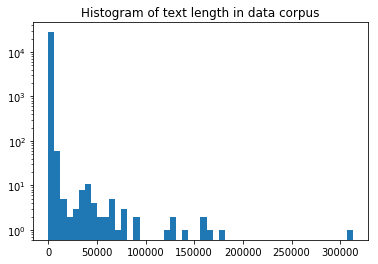

In [24]:
# Create a histogram of text length
l = np.array(length)
b = [10,20,30,40,50,100,200,300,500,1000,2000,5000,10000,20000, 50000,100000,200000,500000]

#res = np.histogram(l,b, )
#print(res)

#Matplotlib

#_ = plt.hist(l, bins = b, histtype='step')
_ = plt.hist(l, bins = 50)
plt.yscale('log')
plt.title("Histogram of text length in data corpus")

plt.show()

In [ ]:
# sanity checks

print(len(CRQ_data))
print(len(CRQ_test_data))
print(len(CRQ_train_data))
print(len(patents_data))
print(len(books_data))
print(len(training_data))

In [ ]:
# Train FastText on local data
model_ft = FastText(training_data, size=300, window=5, min_count=5, workers=4)

In [ ]:
# save model to disk
model_ft.save("../WordEmbeddings/ft_ds.model")

In [ ]:
# sanity checks 
print(len(model_ft.wv.vocab))
similarity = model_ft.wv.similarity('motor', 'starter')
print(similarity)

In [ ]:
# Train word2vec on local dataa
model_w2v = Word2Vec(training_data, size=300, window=5, min_count=5, workers=4)

In [ ]:
#save model to disk
model_w2v.save("../WordEmbeddings/w2v_ds.model")

In [ ]:
#sanity checks

print(len(model_w2v.wv.vocab))
similarity = model_w2v.wv.similarity('motor', 'starter')
print(similarity)